# KNN
*   K-Nearest Neighbors (KNN) is a simple algorithm that predicts a data point's label by looking at the labels of its closest k neighbors.
*   It uses a distance measure (like Euclidean distance) to find the nearest neighbors.
*   The majority label among the neighbors determines the prediction in classification, or the average value is used in regression.

#Suppose we have two distances D1, and D2.
# In K-Nearest Neighbors (KNN), the algorithm takes both 𝐷1 and 𝐷2 (and any other features) together to calculate the distance between the data points
# In both Decision Trees and Random Forests, each split uses one feature at a time. However, Random Forest introduces randomness by selecting a subset of features at each split, while Decision Trees consider all features for each split.

#Characteristics of the K-Nearest Neighbors (KNN) algorithm:

**Instance-based Learning**: KNN is an instance-based learning algorithm, meaning it doesn't have an explicit training phase. Instead, it stores the entire training dataset and makes predictions based on the proximity of test data to training data.

**Non-Parametric**: KNN does not assume any underlying distribution for the data. It makes predictions based on the local structure of the data, meaning it does not require a model to be trained in the traditional sense.

**Lazy Learning**: KNN is considered a lazy learner because it doesn't perform any generalization during training. It simply memorizes the training data and performs computation only at the time of prediction.

**Distance-Based Classification**: KNN makes predictions by calculating the distance between the query point and all points in the training set, typically using Euclidean distance (though other distance metrics can be used). It selects the most common label or the average value of the nearest neighbors.

**Sensitive to Feature Scaling**: KNN is highly sensitive to the scale of the features. If the features are not normalized or standardized, features with larger numerical ranges can dominate the distance calculation, leading to biased predictions.

# Challenges for Euclidean Distance
Euclidean Distance in algorithms like KNN or clustering can face several challenges, particularly in high-dimensional and real-world data scenarios. Here are the key challenges:

**Sensitivity to Feature Scaling**: Features with larger numerical ranges dominate the distance computation, making features with smaller ranges less influential.
Example: If one feature represents age (e.g., 1–100) and another represents income (e.g., 10,000–1,000,000), income will disproportionately affect the distance calculation.

Solution: Normalize or standardize the features to bring them onto the same scale.

**Curse of Dimensionality:** In high-dimensional spaces, data points tend to become equidistant because the volume of the space grows exponentially. This reduces the effectiveness of Euclidean distance in distinguishing between points.
Example: As dimensions increase, even dissimilar points may appear equally distant, reducing the algorithm's accuracy.

Solution: Use dimensionality reduction techniques (e.g., PCA) to reduce the number of features or explore alternative distance metrics.

**Outlier Sensitivity:** Euclidean distance is heavily affected by outliers because it squares the differences between feature values, amplifying the impact of large deviations.
Example: A single large outlier can distort the distance calculation, affecting the algorithm's performance.

Solution: Remove or handle outliers appropriately (e.g., by capping values or using robust distance metrics like Manhattan distance).

**Assumes Linear Relationships:** Euclidean distance assumes that the data is in a linear space. For non-linear data, it may not capture the true structure or proximity of points.
Example: In circular or manifold-shaped data, Euclidean distance might not reflect the shortest path between two points.

Solution: Use non-linear distance metrics (e.g., geodesic distance or cosine similarity) or kernel-based methods.

**Computational Inefficiency in Large Datasets:** Computing Euclidean distance for every pair of points can be computationally expensive, especially in large datasets with high dimensions.
Example: In KNN, for each test point, distances to all training points must be calculated, leading to high computation time.

Solution: Use approximate nearest neighbor methods (e.g., KD-trees, Ball trees) or hashing techniques for faster distance computations.

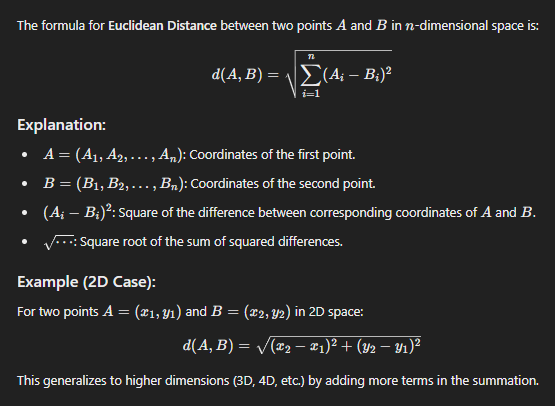

## <b><u> How does kNN work? </u></b>

### The kNN working can be explained on the basis of the below algorithm:

* ### <b>Step-1:</b> Select the number K of the neighbors
* ### <b>Step-2:</b> Calculate the Euclidean distance of K number of neighbors
* ### <b>Step-3:</b> Take the K nearest neighbors as per the calculated Euclidean distance.
* ### <b>Step-4:</b> Among these k neighbors, count the number of the data points in each category.
* ### <b>Step-5:</b> Assign the new data points to that category for which the number of the neighbor is maximum.
* ### <b>Step-6:</b> Our model is ready.

### Suppose we have a new data point and we need to put it in the required category. Consider the below image:

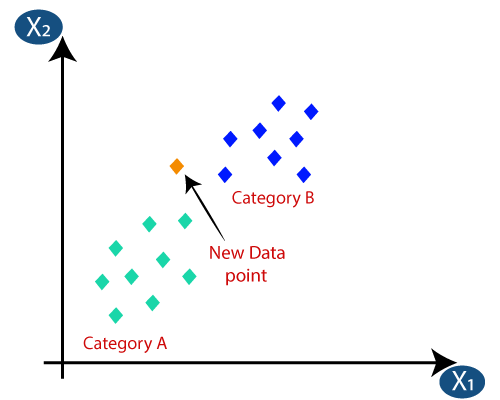

### Firstly, we will choose the number of neighbors, so we will choose k=5.

### Next, we will calculate the Euclidean distance between the data points. The Euclidean distance is the distance between two points, which we have already studied in geometry.

### By calculating the Euclidean distance we got the nearest neighbors, as three nearest neighbors in category A and two nearest neighbors in category B. Consider the below image:

### As we can see the 3 nearest neighbors are from category A, hence this new data point must belong to category A.

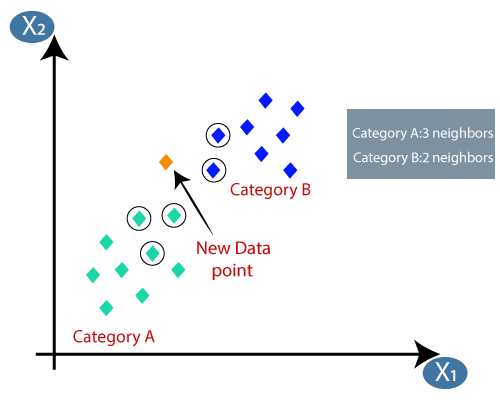

## <b><u>How to select the value of K in the K-NN Algorithm?</b></u>

### Below are some points to remember while selecting the value of K in the K-NN algorithm:

* ### There is no particular way to determine the best value for "K", so we need to try some values to find the best out of them. The most preferred value for K is 5.
* ### A very low value for K such as K=1 or K=2, can be noisy and lead to the effects of outliers in the model.
* ### Large values for K are good, but it may find some difficulties.

## <b><u>Advantages of KNN Algorithm:</b></u>

* ### It is simple to implement.
* ### It is robust to the noisy training data
* ### It can be more effective if the training data is large.


## <b><u>Disadvantages of KNN Algorithm:</b></u>

* ### Always needs to determine the value of K which may be complex some time.
* ### The computation cost is high because of calculating the distance between the data points for all the training samples.

Our objective is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset from the National Institute of Diabetes and Digestive and Kidney Diseases. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [5]:
df = pd.read_excel(r"E:\Learning\Machine Learning\Non Linear Algorithms\diabetes.xlsx")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.shape

(768, 9)

In [7]:
# Let's create numpy arrays for features and target
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# stratify = y ensures that the distribution of the target variable y is the same in both the training and test sets.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

In [10]:
""" 
𝑘 = 1 to 𝑘 = 9 is to find the best value of 𝑘
k for our model that minimizes both bias and variance
"""
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    
    test_accuracy[i] = knn.score(X_test, y_test) 

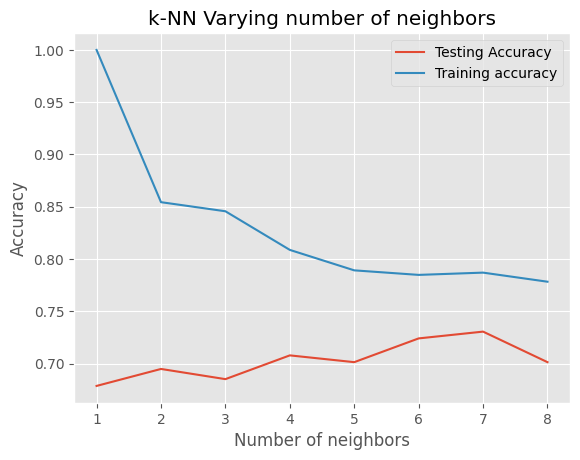

In [11]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [12]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

In [13]:
# Fit the model
knn.fit(X_train,y_train)
print(knn.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


In [14]:
knn.score(X_test,y_test)

0.7305194805194806

score() method in scikit-learn is used to evaluate the performance of a model. Specifically for classification tasks, it calculates the accuracy of the model on a given test dataset.

In [15]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix,roc_curve

In [16]:
# Get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [17]:
confusion_matrix(y_test,y_pred)

array([[165,  36],
       [ 47,  60]], dtype=int64)

In [18]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

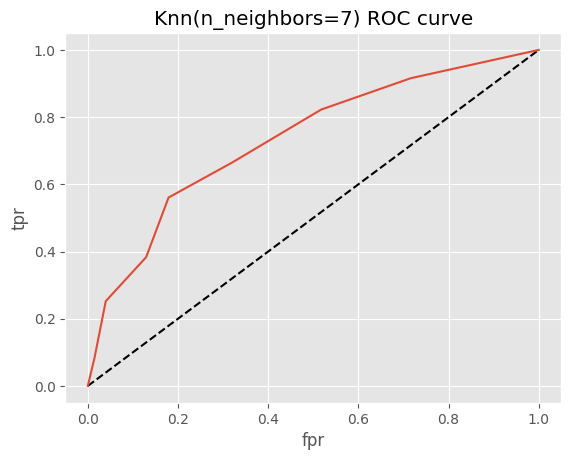

In [20]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [21]:
# Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7345050448691124

In [22]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [23]:
# Best value for n_neighbors
print("Best value for n_neighbors:", knn_cv.best_params_)

# Best cross-validation score (mean score over the folds)
print("Best cross-validation score:", knn_cv.best_score_)

Best value for n_neighbors: {'n_neighbors': 14}
Best cross-validation score: 0.7578558696205755
